# Exercise 08.02

## Problem:

**[Purpose: Pay attention to the output of smryMCMC.]**

The graphical plots from plotMCMC are useful for understanding, but they lack some numerical details. Run the high-level script, `Jags-Ydich-XnomSsubj-MbernBeta-Example.R`, and explain the details in the output from `smryMCMC`. Explain what the `rope` and `ropeDiff` arguments do.

## Solution:

First, source the utilities:

In [1]:
source("../DBDA2Eprograms/DBDA2E-utilities.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



Loading required package: coda
Linked to JAGS 4.1.0
Loaded modules: basemod,bugs


The following code comes from the `Jags-Ydich-XnomSsubj-MbernBeta-Example.R` file:

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 15
   Unobserved stochastic nodes: 2
   Total graph size: 38

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                       Mean    Median      Mode   ESS HDImass      HDIlow
theta[1]          0.6658595 0.6765507 0.7118420 50000    0.95  0.40636154
theta[2]          0.3639237 0.3550422 0.3391836 50000    0.95  0.10484638
theta[1]-theta[2] 0.3019357 0.3109332 0.3551293 50000    0.95 -0.07923219
                    HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh PcntLtROPE
theta[1]          0.9013469      NA            NA    0.45     0.55      6.264
theta[2]          0.6322683      NA            NA    0.45     0.55     73.540
theta[1]-theta[2] 0.6598008       0        93.504   -0.05     0.05      4.032
                  PcntInROPE PcntGtROPE
theta[1]              13.024     80.712
theta[2]              16.252     10.208
theta[1

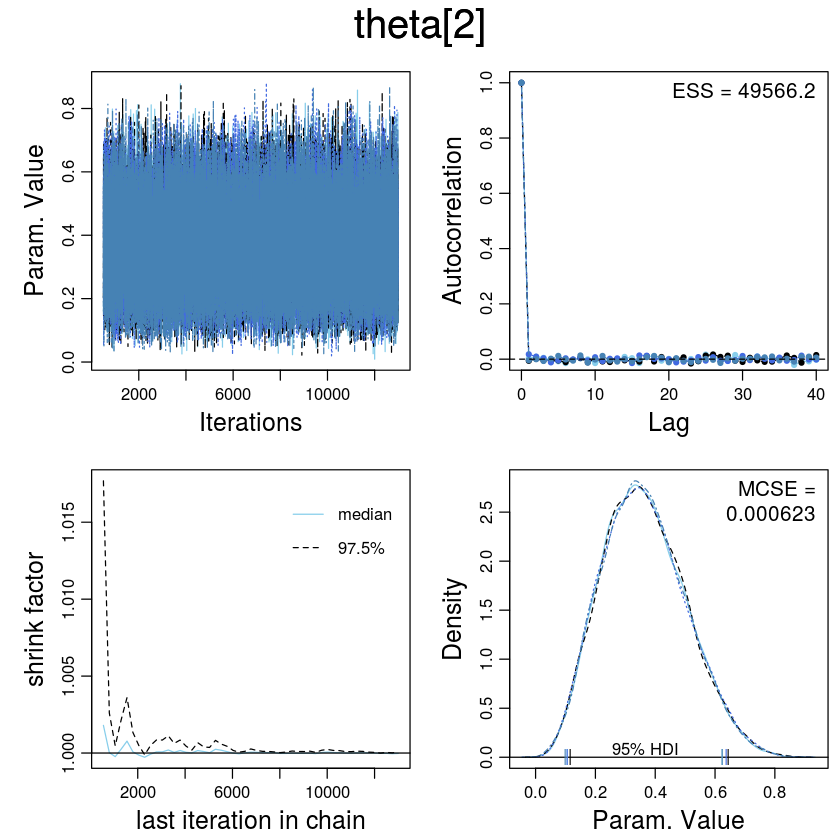

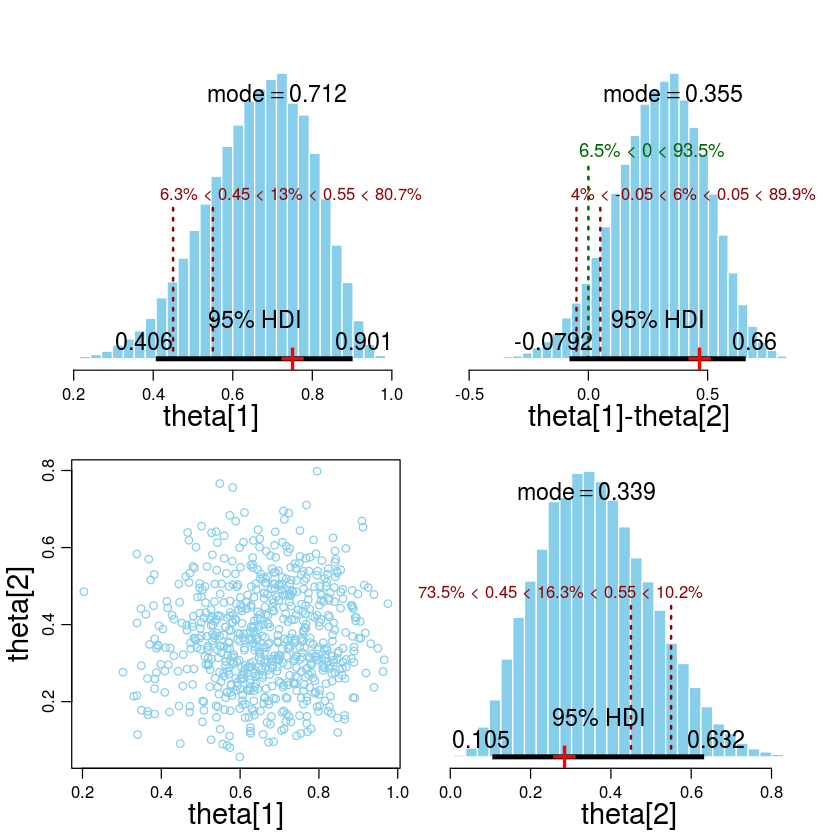

In [4]:
# Load The data 
myData = read.csv("../DBDA2Eprograms/z6N8z2N7.csv")
# N.B.: The functions below expect the data to be a data frame, 
# with one component named y being a vector of integer 0,1 values,
# and one component named s being a factor of subject identifiers.
#------------------------------------------------------------------------------- 
# Load the relevant model into R's working memory:
source("../DBDA2Eprograms/Jags-Ydich-XnomSsubj-MbernBeta.R")
#------------------------------------------------------------------------------- 
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=50000 )
#------------------------------------------------------------------------------- 
# Display diagnostics of chain, for specified parameters:
parameterNames = varnames(mcmcCoda) # get all parameter names
for ( parName in parameterNames ) {
  diagMCMC( codaObject=mcmcCoda , parName=parName  )
}
#------------------------------------------------------------------------------- 
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=NULL , rope=c(0.45,0.55) ,
                        compValDiff=0.0 , ropeDiff = c(-0.05,0.05) ,
                      )
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , compVal=NULL , rope=c(0.45,0.55) ,
          compValDiff=0.0 , ropeDiff = c(-0.05,0.05) 
        )
#------------------------------------------------------------------------------- 

The `smryMCMC` function takes the generated chain and outputs summary statistics form hte data. It outputs hte mean, median, mode, ESS, and information about the HDI for $\theta_{1}$, $\theta_{2}$, and the difference between the two distributions.

Since the `rope`/`ropediff` options are specified, it also outputs information about the ROPE bounds and how the HDI bounds compare to ROPE. ROPE is an effective interval in which the value for the null hypothesis could lie. If the HDI covers the entirely of the ROPE interval, the null hypothesis is not rejected. For both $\theta_{1}$ and $\theta_{2}$, a significant portion of the credible probability within the HDI lies in ROPE, so the null hypothesis of $\theta_{j} = 0.5$ cannot be rejected. At the same time, very little lies in the difference, so perhaps it can. It is a judgment call at this point.

